### POSTTEST 6
## Muhammad Basith Algiffari
## 2009100671

Import library yang digunakan

In [65]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

membaca file csv di folder Posttest_KB_5

In [4]:
df = pd.read_csv('../Posttest_KB_5/diabetes.csv');

menampilkan dataset

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


mengubah attibut Outcome dari int64 ke object

In [20]:
df['Outcome'] = df['Outcome'].astype('object')

mengganti record pada attribute outcome dengan 1 = positive dan 0 = negative

In [21]:
df['Outcome'].replace(1, 'Positive', inplace=True)
df['Outcome'].replace(0, 'Negative', inplace=True)

membikin model menggunakan metode K-Means dengan tetangga terdekat 2

In [22]:
kmean = KMeans(n_clusters=2)

memilih attribute yang akan dilatih

In [23]:
x_data = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

melakukan fit terhadap model

In [24]:
kmean.fit(x_data)

KMeans(n_clusters=2)

menentukan label untuk cluster

In [25]:
x_label = kmean.labels_

menampilkan hasil dari clustering

In [26]:
print(x_label)

[1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1
 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1
 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 1 

membuat data frame label dan attribute outcome

In [72]:
model_kmean = pd.DataFrame({'labels': df.Outcome, 'Outcome': x_label})

membuat pie chart dengan menjadikan attribute outcome

In [73]:
data_pie = model_kmean['labels'].value_counts().rename_axis('Outcome').reset_index(name='Id_counts')

<Figure size 1440x1440 with 0 Axes>

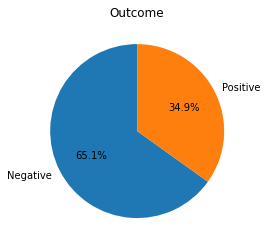

In [74]:
plt.figure(figsize=(20,20))
plt.figure().set_facecolor('white')
plt.pie(data_pie.Id_counts, labels=data_pie.Outcome, startangle=90, autopct='%.1f%%')
plt.title('Outcome')
plt.show()